<a href="https://colab.research.google.com/github/hossein20s/AnExample/blob/master/wrist_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!wget bit.ly/initnotebook -O init.ipynb
%run init.ipynb

--2019-06-23 02:47:50--  http://bit.ly/initnotebook
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb [following]
--2019-06-23 02:47:50--  https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2560 (2.5K) [text/plain]
Saving to: ‘init.ipynb’

init.ipynb          100%[===================>]   2.50K  --.-KB/s    in 0s      

2019-06-23 02:47:51 (31.9 MB/s) - ‘init.ipynb’ saved [2560/2560]

Drive already mounted at /gdrive; to attempt to forcibly 

In [0]:
DATA_FILE = 'data/wrist-ppg.csv'
feature_column = 'ppg'
config_file = 'data/vital_signs_case01.yaml'
initial_epoch = 400

import yaml
with open(config_file, 'r') as stream:
    config = yaml.safe_load(stream)




*   List item
*   List item



In [3]:

!pip install wfdb

     |████████████████████████████████| 102kB 6.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb


reading data from file data/wrist-ppg.csv
Raw data (14900, 2)
Dropna with selected columns (14900, 1)
before normalize:             ppg
0  1214.655304
1  1215.374558
after normalize:          ppg
0  0.053355
1  0.062622
processing sliding window
label_column: None
feature_column: ppg
Random shuffeling


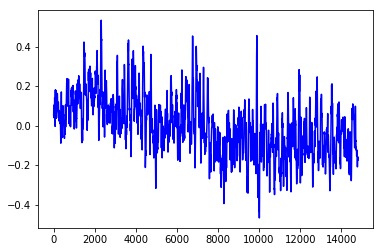

In [17]:
import datautil
from datautil import data_reader
import matplotlib.pyplot as plt

window_size = config['window_size']
reader = data_reader(DATA_FILE, feature_column=feature_column, window_size=window_size)

X, _ = reader.get_whole()
plt.plot(X[:,0], 'b')
plt.show()

In [13]:
import modelutil
from modelutil import load_model_yaml

model = load_model_yaml(config['CHECKPOINTS_DIR'], config['model_name'], initial_epoch)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

load model from file checkpoints/model.lstmconv1D.yaml
loading weights from  checkpoints/model.lstmconv1D.epoch400.h5


W0623 02:10:31.769448 140159234721664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0623 02:10:31.770575 140159234721664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0623 02:10:31.902715 140159234721664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



(14820, 80, 1)
(14820, 1)


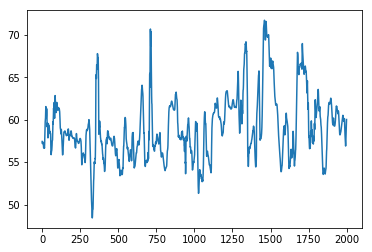

In [19]:
print(X.shape)
predicted = model.predict(X)
print(predicted.shape)
BP = predicted * config['scaleRatio4label'] + config['scaleBias4label']
plt.plot(BP[0:2000])

In [0]:
size = predicted.shape[0]
df = pd.DataFrame(index=reader.dataframe.iloc[0:size].index)
#df = reader.dataframe[0:predicted.shape[0]]
print(dataframe.shape)
df['ppg'] = predicted
result = df * (reader.dataframe.max() - reader.dataframe.min()) + reader.dataframe.mean()
#esult = (dataframe - dataframe.mean())/(dataframe.max() - dataframe.min())
print('xxx', result.head(2))
BP = reader.scaledBackDataFrame(predicted, 
                                predicted.shape[0], 'ppg')

(14820, 1)
xxx            ppg
0  1204.337896
1  1205.457035


KeyError: ignored

DB list [['adfecgdb', 'Abdominal and Direct Fetal ECG Database'], ['aftdb', 'AF Termination Challenge Database'], ['ahadb', 'AHA Database [sample excluded record]'], ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'], ['apnea-ecg', 'Apnea-ECG Database'], ['chfdb', 'BIDMC Congestive Heart Failure Database'], ['bidmc', 'BIDMC PPG and Respiration Dataset'], ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'], ['capslpdb', 'CAP Sleep Database'], ['crisdb', 'CAST RR Interval Sub-Study Database'], ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'], ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'], ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'], ['challenge/2010/set-a', 'Challenge 2010 Training Set A'], ['challenge/2010/set-b', 'Challenge 2010 Test Set B'], ['challenge/2010/set-c', 'Challenge 2010 Test Set C'], ['challenge/2011/sim', 'Challenge 2011 Pilot Set'], ['challenge/2011/set-a', 'Challenge 2011 Training Set A'], ['challenge/2011/set-b', 'Challenge 2011 

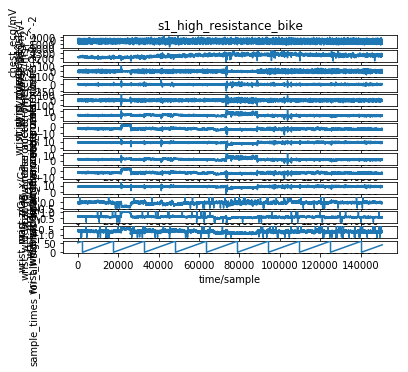

header dictionary {'record_name': 's1_high_resistance_bike', 'n_sig': 15, 'fs': 256, 'counter_freq': None, 'base_counter': None, 'sig_len': 150785, 'base_time': None, 'base_date': None, 'comments': ['High resistance biking_level 6'], 'sig_name': ['chest_ecg', 'wrist_ppg', 'wrist_gyro_x', 'wrist_gyro_y', 'wrist_gyro_z', 'wrist_low_noise_accelerometer_x', 'wrist_low_noise_accelerometer_y', 'wrist_low_noise_accelerometer_z', 'wrist_wide_range_accelerometer_x', 'wrist_wide_range_accelerometer_y', 'wrist_wide_range_accelerometer_z', 'wrist_mag_x', 'wrist_mag_y', 'wrist_mag_z', 'sample_times_for_all_signals_apart_from_ecg'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['s1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_

In [0]:
import wfdb

db = wfdb.get_dbs()
print('DB list', db)
db_name = 'wrist'
record_name = 's1_high_resistance_bike'
list = wfdb.get_record_list('wrist')
print('Record list', list)
record = wfdb.rdrecord(record_name, pb_dir=db_name)
header = wfdb.rdheader(record_name, pb_dir=db_name)
wfdb.plot_wfdb(record=record, title=record.record_name)
print('header dictionary', header.__dict__)



In [0]:
import pandas as pd

signals, fields = wfdb.rdsamp(record_name, channels=[1], sampfrom=100, sampto=15000, pb_dir=db_name)
print('Sample signals', signals)
print('Sample fields', fields)
ppg = signals[:,0]
df = pd.DataFrame()
df['ppg'] = ppg

df.to_csv(DATA_FILE)


Sample signals [[1214.65530425]
 [1215.37455824]
 [1216.22825223]
 ...
 [1212.07405627]
 [1211.77492728]
 [1211.57998928]]
Sample fields {'fs': 256, 'sig_len': 14900, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['wrist_ppg'], 'comments': ['High resistance biking_level 6']}


# Analyze via Facets

In [0]:
import pandas as pd

df = pd.DataFrame()
df['ppg'] = ppg

!wget bit.ly/facets_display_ipynb -O facets_display.ipynb
%run facets_display.ipynb

#facets_display(df)

--2019-06-17 03:42:23--  http://bit.ly/facets_display_ipynb
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/hossein20s/0b9a6d250da3ede146846027328b12f7/raw/8401a8c4183f54e76cae5e03e539ebd77af11d1e/facets_display.ipynb [following]
--2019-06-17 03:42:23--  https://gist.githubusercontent.com/hossein20s/0b9a6d250da3ede146846027328b12f7/raw/8401a8c4183f54e76cae5e03e539ebd77af11d1e/facets_display.ipynb
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2532 (2.5K) [text/plain]
Saving to: ‘facets_display.ipynb’

facets_display.ipyn 100%[===================>]   2.47K  --.-KB/s    in 0s      

2

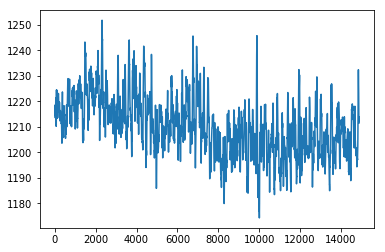

In [0]:
import matplotlib.pyplot as plt

plt.plot(df)

In [0]:
import numpy as np

print(df.shape)
print(df.iloc[0:10,0])
data = df.values
data_size = data.shape[0]
window_size = 80
windowed = np.zeros((data_size - window_size, window_size))
for counter in range(data_size - window_size):
  xx = data[counter:counter + window_size,0]
  windowed[counter,:] = xx
print(windowed.shape)

(14900, 1)
0    1214.655304
1    1215.374558
2    1216.228252
3    1217.095390
4    1217.824727
5    1218.315433
6    1218.533898
7    1218.543981
8    1218.443151
9    1218.318794
Name: ppg, dtype: float64
(14820, 80)


In [0]:
import modelutil

model = modelutil.load_model_yaml('models', 'ramtin2lstm64.epoch-100')
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

W0617 03:45:46.683506 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 03:45:46.700191 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 03:45:46.706363 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



load model from file models/model.ramtin2lstm64.epoch-100.yaml


W0617 03:45:47.187403 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 03:45:47.189178 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0617 03:45:47.278128 139689038301056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



loading weights from  models/model.ramtin2lstm64.epoch-100.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [0]:
print(windowed.shape)
X = np.expand_dims(windowed, axis=-1)
print(X.shape)

(14820, 80)
(14820, 80, 1)


In [0]:

predicted_bp = model.predict(X)

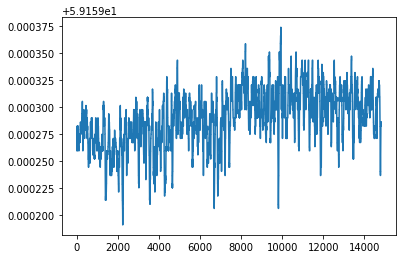

In [0]:
import matplotlib.pyplot as plt

plt.plot(predicted_bp)